# Activity: Explore sampling

## Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [34]:
# Import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [35]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
epa_data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-4\Data\shared_data\c4_epa_air_quality.csv", index_col = 0)

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [36]:
# First 10 rows of the data

epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the `aqi` column represent?

The aqi column represents the Air Quality Index (AQI), a standardized measure ranging from 0 to 500 that indicates the level of air pollution and associated health concerns.

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [37]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [38]:
epa_data['aqi'].median()

np.float64(5.0)

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

The mean value of the aqi column is 6.757692. This value will later be compared to the mean obtained from sampling with replacement in the notebook.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

The count value for the aqi column is 260, indicating that there are 260 AQI measurements in the dataset.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [39]:
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.757692307692308)

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [40]:
sampled_data=epa_data.sample(n=50,replace=True,random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [41]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

Sampling with replacement means that after selecting a particular observation, it is not removed from the pool of possible selections, allowing it to be selected again. Row index 102 happened to be sampled more than once due to this process.

**Question:** What does `random_state` do?


The random_state parameter assigns a random seed, ensuring reproducibility of the sample. This allows the same rows in the dataset to be sampled with replacement each time the command is run, which is important for consistent analysis on the same sample.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [42]:
sample_mean=sampled_data['aqi'].mean()
sample_mean

np.float64(5.54)

 **Question:**  Why is `sample_mean` different from `population_mean`?


Because of sampling variability, the sample mean is a point estimate of the population mean, calculated from a random sample of 50 rows drawn from the 260 rows in the main dataset (or sampling frame).

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [43]:
estimate_list=[]
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [44]:
estimate_df=pd.DataFrame(data={'estimate':estimate_list})
estimate_df

,estimate
0,6.78
1,6.26
2,6.72
3,7.20
4,6.80
...,...
9995,7.90
9996,5.58
9997,6.02
9998,6.76


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [45]:
mean_sample_means=estimate_df['estimate'].mean()
mean_sample_means

np.float64(6.774089999999999)

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

The mean for the sampling distribution of 10,000 random samples is 6.748 for the current list of means. This value may vary, as random_state was not set, meaning the sample is not reproducible.

**Question:** How are the central limit theorem and random sampling (with replacement) related?

Random sampling with replacement is related to the central limit theorem because it ensures that observations are drawn independently from the population. The central limit theorem states that if the sample size is large enough and observations are drawn independently (or with replacement), the sampling distribution of the sample mean will approach a normal distribution. This normal distribution's mean will be the population mean, and its standard deviation will be the standard error. Random sampling ensures that each element has an equal probability of being selected, reducing bias, and when sampling with replacement, it supports independent draws, allowing the central limit theorem to apply.

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

<Axes: >

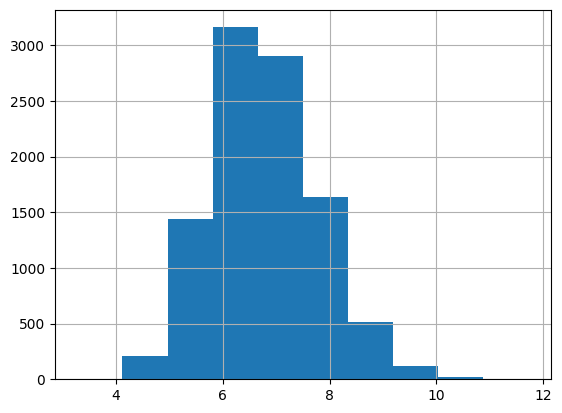

In [46]:
estimate_df['estimate'].hist()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [47]:
standard_error=sampled_data['aqi'].std()/np.sqrt(len(sampled_data))

standard_error

np.float64(0.7413225908290325)

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

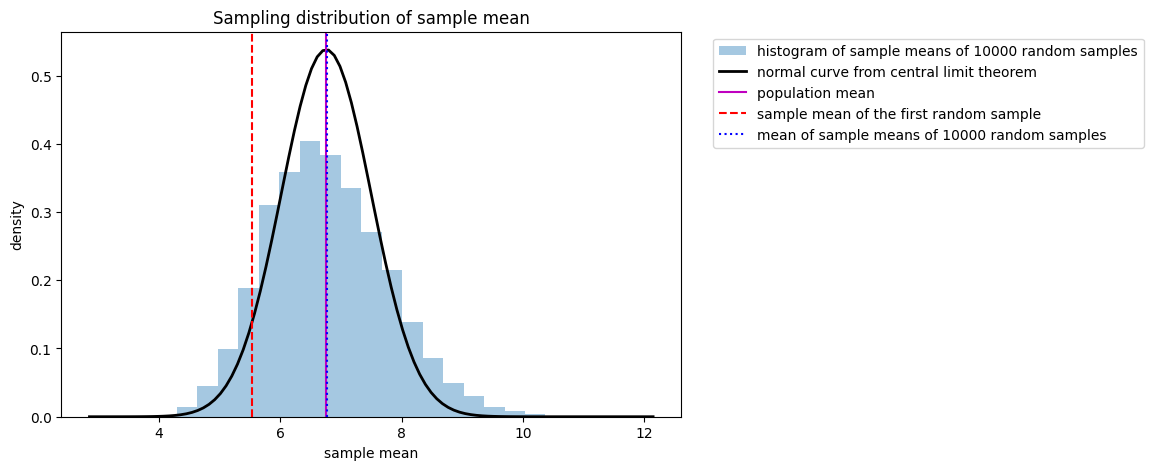

: 

In [48]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

**Question:** What insights did you gain from the preceding sampling distribution?

From the sampling distribution, I observed the following insights:

- As the number of sampling means increased, the distribution of sample means approached a normal distribution, which aligns with the central limit theorem.
- The sample mean from the first random sample (red dashed line) is off-center, demonstrating sampling variability. This mean would differ if random_state had a different value, highlighting the impact of random sampling.
- The population mean (green solid line) and the mean of the sample means from 10,000 random samples (blue dotted line) essentially coincide, confirming the central limit theorem, which states that the sampling distribution of the mean will converge to the population mean as sample size increases.

# Considerations

**What are some key takeaways that you learned from this lab?**

From this lab, I learned that Python's sample function can be used for random sampling, allowing us to make inferences about the population from the sample. It also provides insights into the dataset by helping us predict and infer population statistics based on sample data alone. The central limit theorem plays a crucial role in understanding the sampling distribution, as taking a large enough sample or many sample means results in a histogram that resembles a normal distribution (bell curve). Additionally, the mean of the sample means converges toward the true population mean, while the first sample mean differs, showcasing sampling variability.

**What findings would you share with others?**

I would share that the mean AQI of the population is higher than the mean of the first sample, and the difference is large enough to suggest a meaningful deviation rather than just random variation due to sampling. If the difference between the sample mean and population mean exceeds a threshold (e.g., 2-3 standard errors), it indicates that the observed difference is statistically significant. This suggests that the disparity could be due to factors such as pollution sources, geography, or other influencing elements, rather than random chance.

The first sample mean was much below 100, indicating that the sample may have included regions with generally good air quality. Since the difference between the sample mean and population mean was statistically significant (2–3 standard errors away), it confirms that this is not just a random fluctuation, but likely reflects a genuine characteristic of the sample.

**What would you convey to external stakeholders?**

I would convey that, based on the analysis, carbon monoxide (CO) levels are satisfactory in general. However, it is important to allocate funding to investigate regions where unhealthy levels of CO may still exist and work towards improving air quality in those areas. Further targeted research and interventions could help mitigate risks in regions with suboptimal air quality.